In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
learning_rate = 0.1
training_epochs = 2000

In [3]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [4]:
x1_label1 = np.random.normal(3, 1, 1000)
x2_label1 = np.random.normal(2, 1, 1000)
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)
x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))

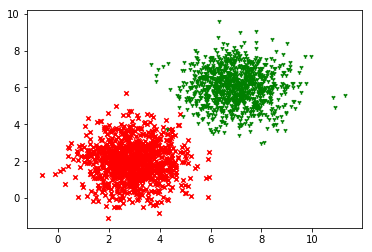

In [5]:
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)
plt.show()

In [6]:
X1 = tf.placeholder(tf.float32, shape=(None,), name="x1")
X2 = tf.placeholder(tf.float32, shape=(None,), name="x2")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0., 0.], name="w", trainable=True)

In [7]:
y_model = tf.sigmoid(w[2] * X2 + w[1] * X1 + w[0])
cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - y_model) * (1 - Y)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X1: x1s, X2: x2s, Y: ys})
        print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X1: x1s, X2: x2s, Y: ys})

0 0.6931461
1 0.60671973
2 0.6000271
3 0.59513074
4 0.59037125
5 0.5857311
6 0.58120507
7 0.57678896
8 0.5724779
9 0.568268
10 0.5641549
11 0.5601346
12 0.5562037
13 0.5523582
14 0.5485951
15 0.5449108
16 0.5413023
17 0.5377668
18 0.53430116
19 0.5309028
20 0.52756923
21 0.5242979
22 0.5210866
23 0.517933
24 0.51483476
25 0.5117902
26 0.5087973
27 0.5058541
28 0.50295913
29 0.5001102
30 0.49730626
31 0.49454558
32 0.4918266
33 0.4891482
34 0.4865089
35 0.4839074
36 0.48134264
37 0.47881332
38 0.4763186
39 0.47385702
40 0.4714282
41 0.46903062
42 0.46666375
43 0.4643264
44 0.46201804
45 0.4597377
46 0.45748463
47 0.45525825
48 0.45305774
49 0.45088238
50 0.4487317
51 0.44660497
52 0.44450176
53 0.44242126
54 0.4403631
55 0.43832678
56 0.43631157
57 0.43431732
58 0.4323434
59 0.43038934
60 0.42845482
61 0.42653933
62 0.42464244
63 0.422764
64 0.42090347
65 0.4190605
66 0.41723475
67 0.415426
68 0.4136338
69 0.41185793
70 0.41009796
71 0.40835384
72 0.40662518
73 0.4049116
74 0.40321296
7

706 0.11414418
707 0.11402702
708 0.11391012
709 0.11379355
710 0.11367719
711 0.11356117
712 0.11344537
713 0.113329865
714 0.11321463
715 0.11309969
716 0.112984985
717 0.112870544
718 0.11275641
719 0.11264252
720 0.1125289
721 0.112415545
722 0.11230246
723 0.11218962
724 0.11207709
725 0.111964785
726 0.111852735
727 0.11174097
728 0.11162946
729 0.111518174
730 0.11140718
731 0.11129644
732 0.11118595
733 0.111075714
734 0.11096573
735 0.11085599
736 0.110746525
737 0.1106373
738 0.11052832
739 0.11041959
740 0.11031111
741 0.11020287
742 0.1100949
743 0.109987184
744 0.109879665
745 0.10977243
746 0.10966542
747 0.109558664
748 0.10945213
749 0.10934585
750 0.10923981
751 0.10913401
752 0.10902845
753 0.10892313
754 0.108818054
755 0.108713195
756 0.108608596
757 0.1085042
758 0.10840003
759 0.10829612
760 0.10819243
761 0.10808898
762 0.107985765
763 0.10788277
764 0.10778003
765 0.107677475
766 0.10757516
767 0.107473105
768 0.10737125
769 0.107269615
770 0.1071682
771 0.10706

In [9]:
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-x2_test * w_val[2] - x1_test * w_val[1] - w_val[0])
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)


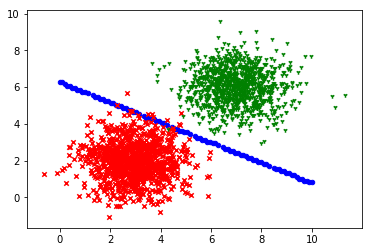

In [10]:
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)
plt.show()